
# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs
# Dr. Ryan Ahmed @STEMplicity
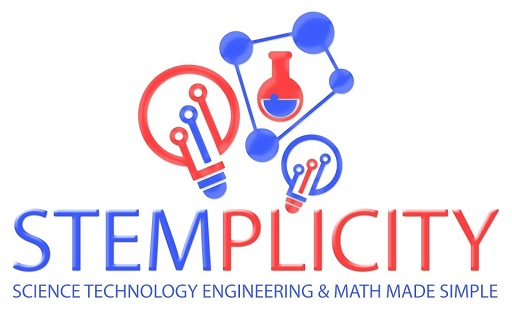



# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [58]:
X_train.shape # (50000, 32, 32, 3) -> 50000개의 이미지, 32x32 픽셀, 3개의 채널(RGB)

(50000, 32, 32, 3)

In [59]:
X_test.shape

(10000, 32, 32, 3)

In [60]:
y_train.shape 


(50000, 1)

In [61]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[7]


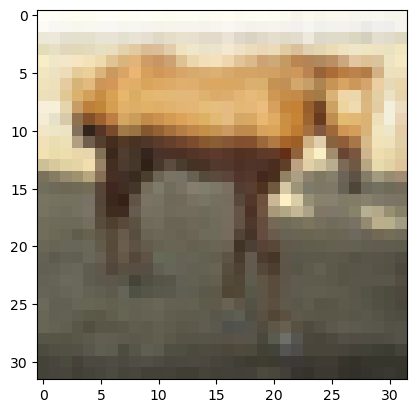

In [62]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

/Users/jewelrymac/anaconda3/envs/machinelearing/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


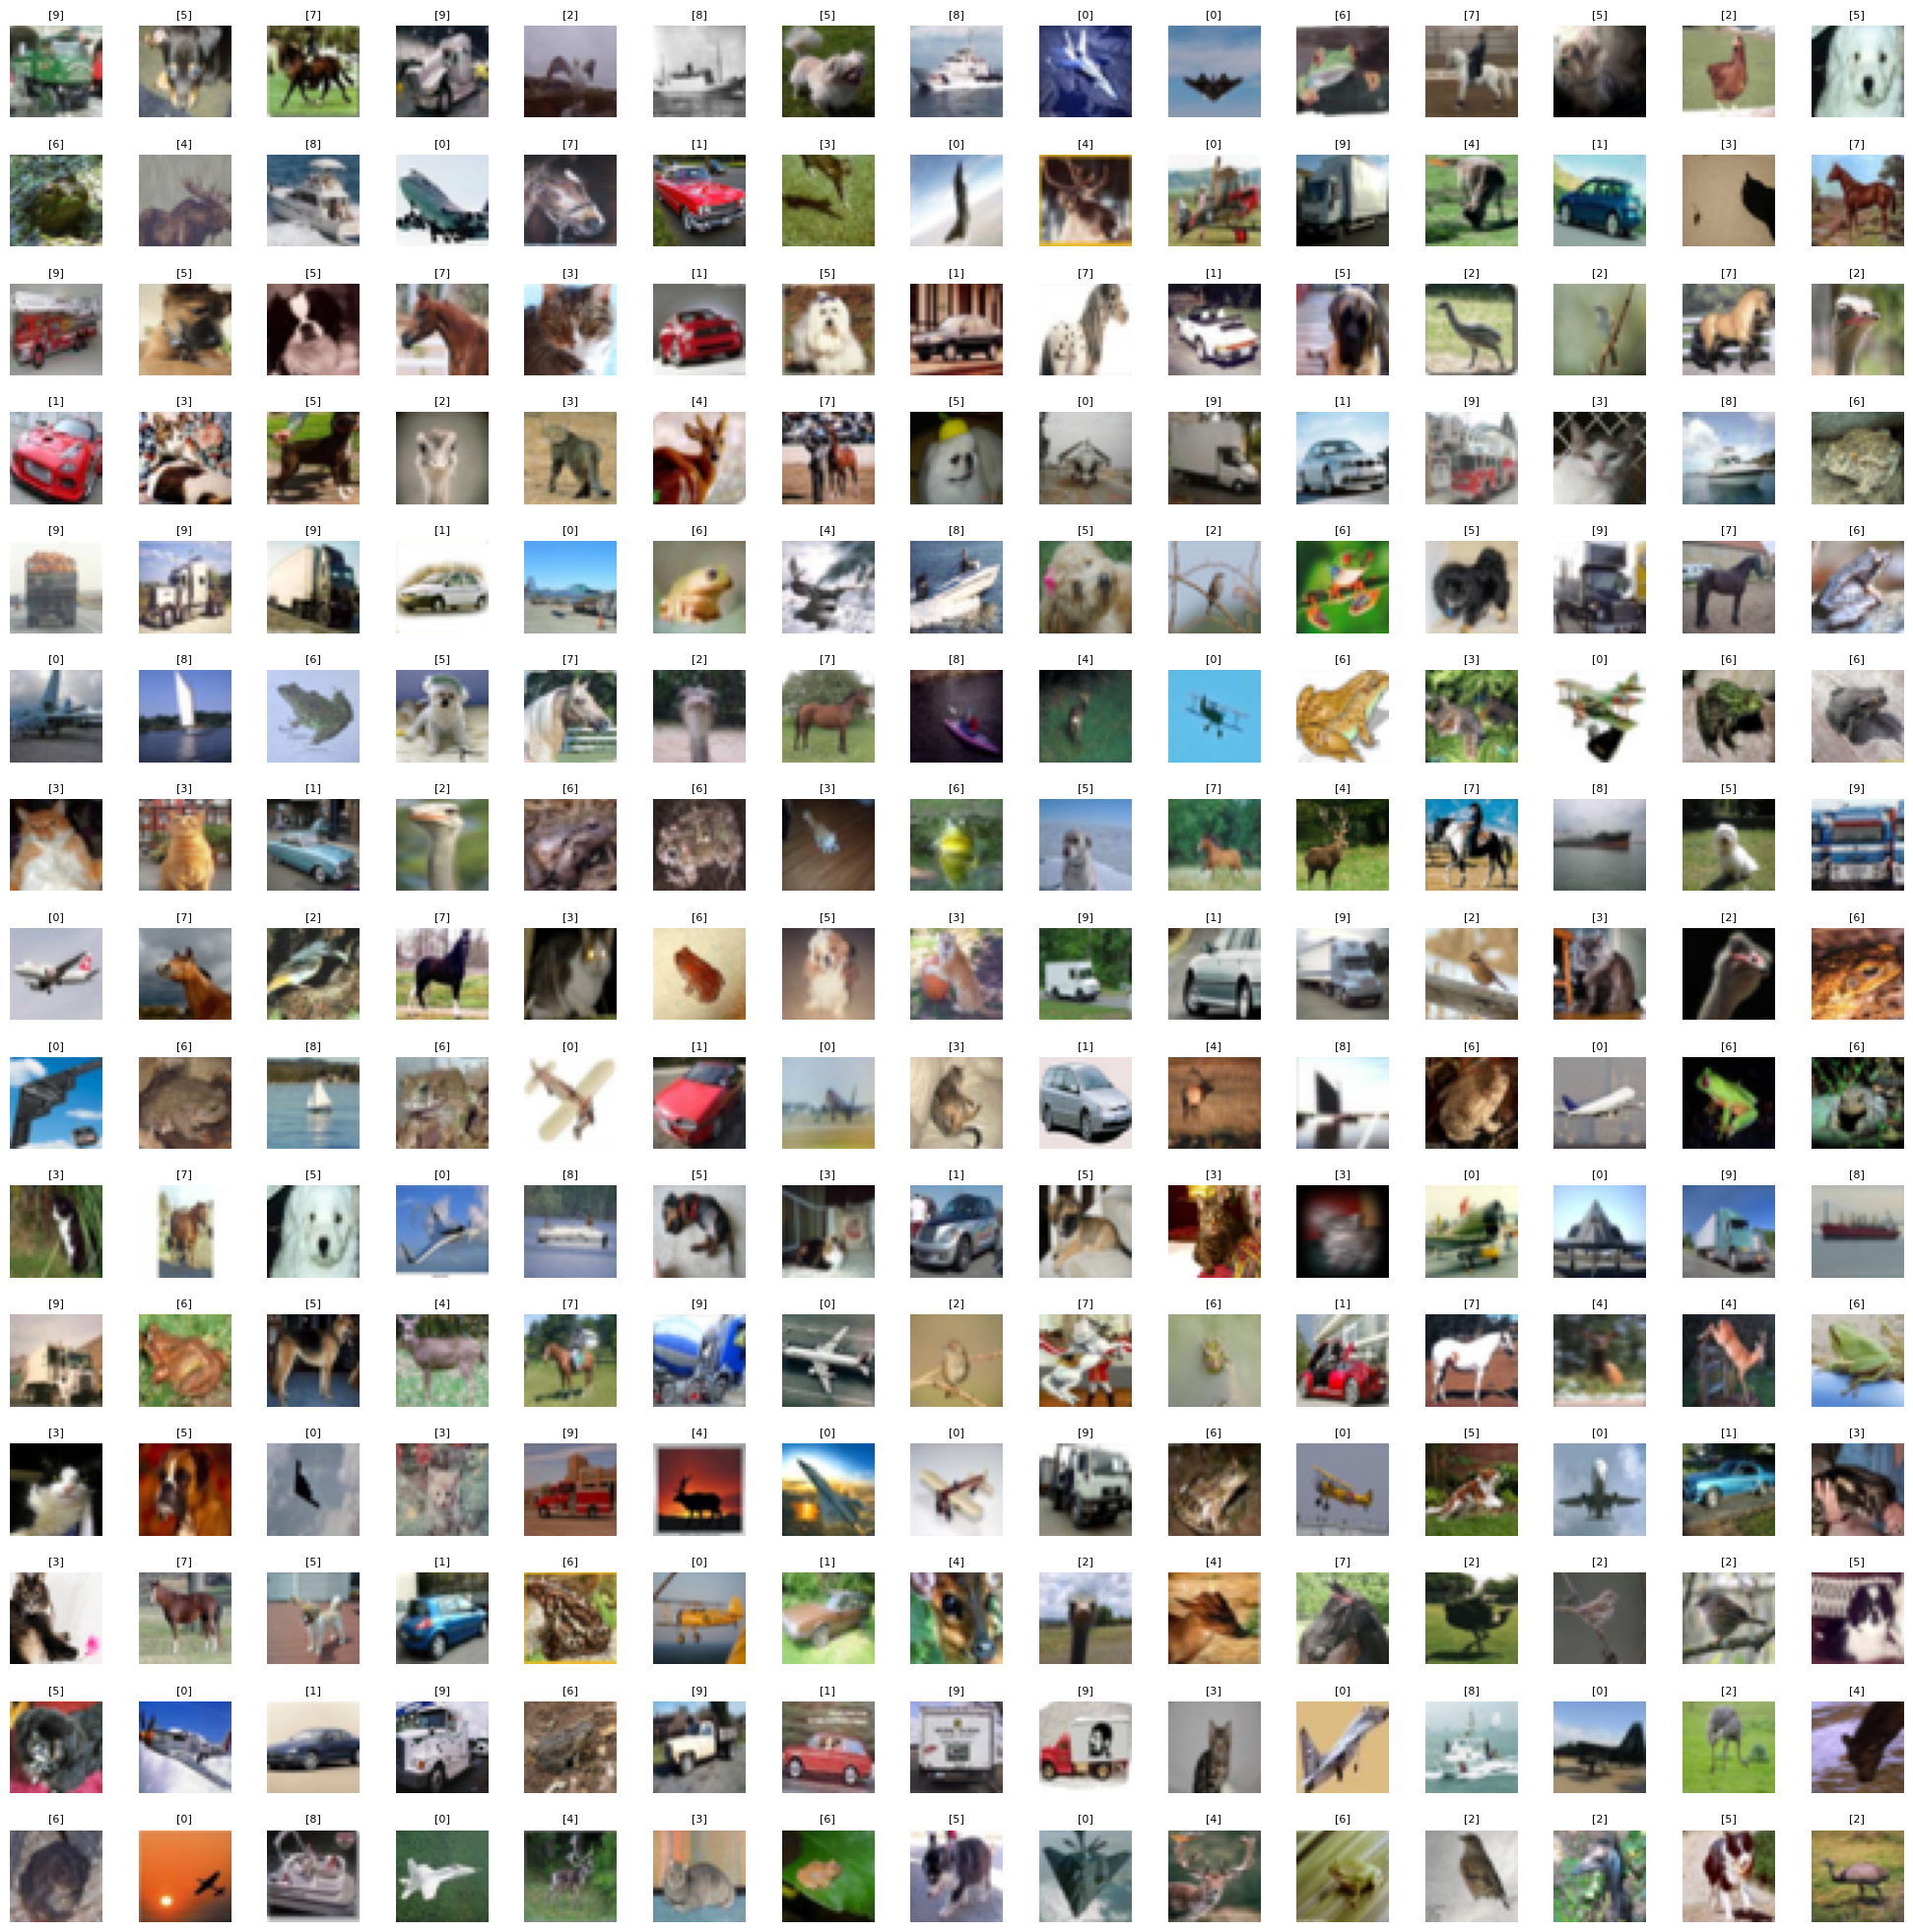

In [63]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel() # Flatten the 15 x 15 matrix into 225 array

n_training = len(X_train) # Get the length of the training dataset

for i in np.arange(0, L_grid * W_grid): # Select a random number from 0 to n_training
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [64]:
n_training

50000

# STEP #3: DATA PREPARATION

In [65]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [66]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [67]:
number_cat = 10

In [68]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [69]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [70]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [72]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [73]:
X_train = X_train / 255
X_test = X_test / 255

In [74]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [75]:
X_train.shape

(50000, 32, 32, 3)

In [76]:
input_shape = X_train.shape[1:]

In [77]:
input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [78]:
from keras.models import Sequential # 백엔드에서는 텐서플로가 돌지만, 텐서플로보다 케라스가 더 쉽게 사용할 수 있도록 해줌
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [79]:
# 합성곱 신경망 설계
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = input_shape, activation = 'relu'))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())
# 은닉층
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dense(512, activation = 'relu'))
# 출력층
cnn_model.add(Dense(units=10, activation = 'softmax')) # 0, 1 로 분류, 회귀가 아니기 때문에 softmax 사용




In [80]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(lr=0.001), metrics=['accuracy'])

In [81]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=1, shuffle=True, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 216s 4ms/step - loss: 1.6534 - accuracy: 0.3931 - val_loss: 1.3305 - val_accuracy: 0.5144


# STEP #5: EVALUATE THE MODEL

In [82]:
evalution=cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evalution[1]))

10000/10000 [==============================] - 11s 1ms/step
Test Accuracy: 0.5144000053405762


In [83]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 1, 8, ..., 5, 2, 7])

In [84]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [85]:
y_test=y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

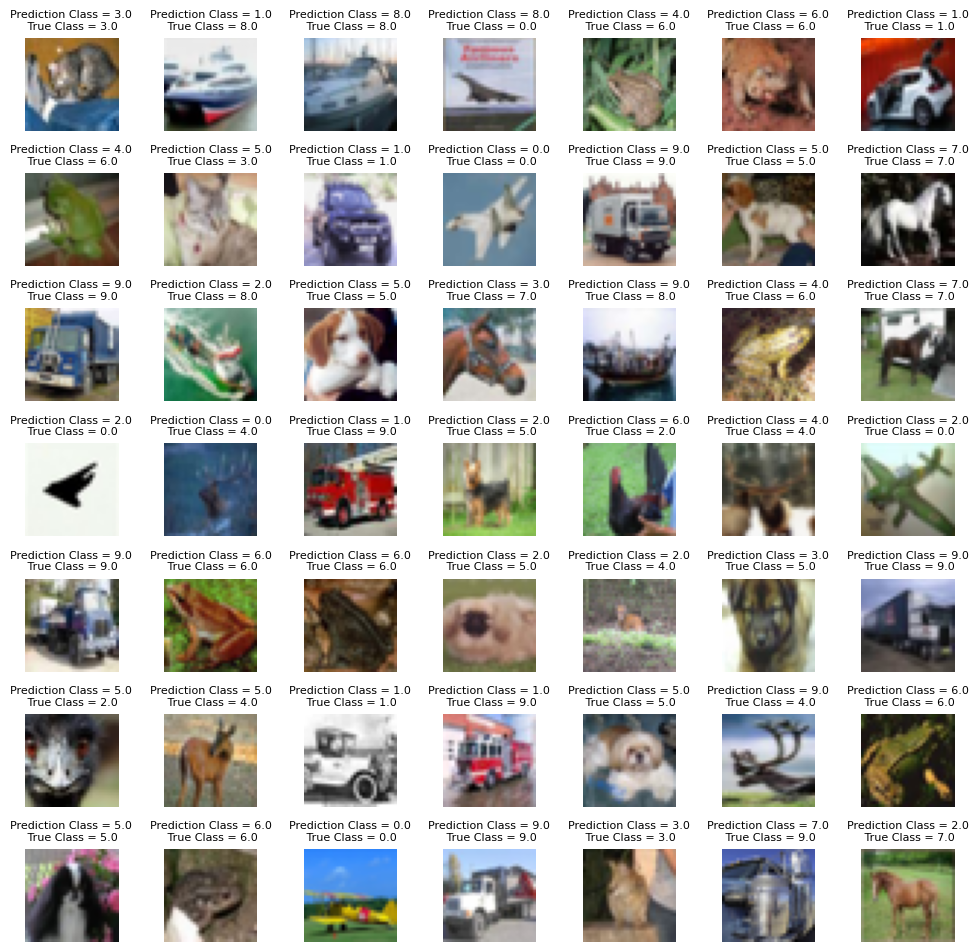

In [86]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # Flatten the 15 x 15 matrix into 225 array

for i in np.arange(0, L * W): # Select a random number from 0 to n_training
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


<AxesSubplot:>

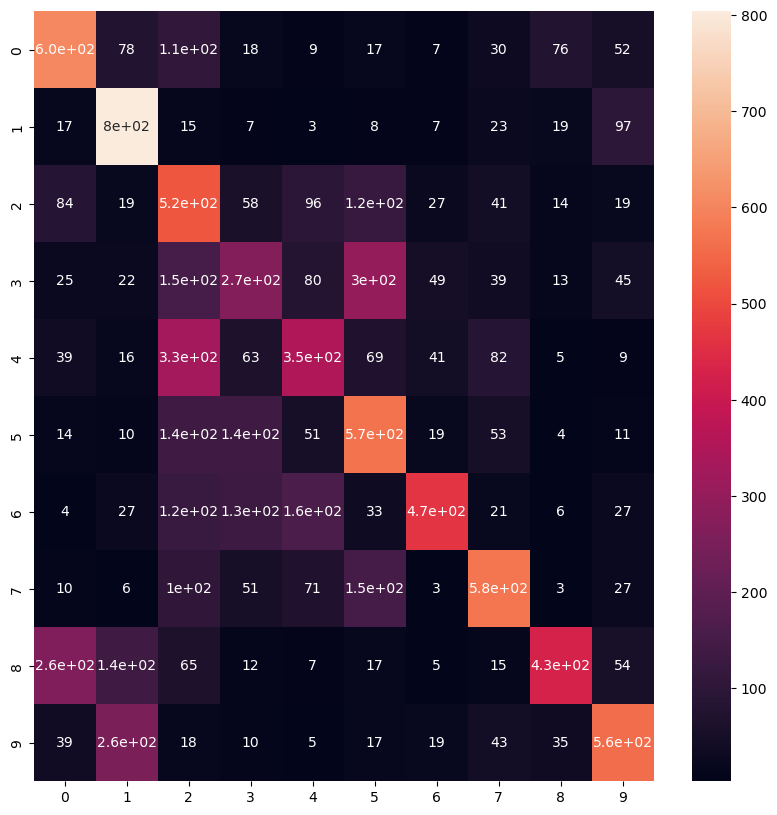

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)



# STEP #6: SAVING THE MODEL

In [88]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'cifar10_cnn_model.h5')
cnn_model.save(model_path)



# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [89]:
import keras
from keras.datasets import cifar10

# (X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [90]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')



In [91]:
# X_train.shape

In [92]:
# n = 8
# X_train_sample = X_train[:n]

In [93]:
# X_train_sample.shape

In [94]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen_train = ImageDataGenerator(
#     featurewise_center=False,  # set input mean to 0 over the dataset
#     samplewise_center=False,  # set each sample mean to 0
#     featurewise_std_normalization=False,  # divide inputs by std of the dataset
#     samplewise_std_normalization=False,  # divide each input by its std
#     zca_whitening=False,  # apply ZCA whitening
#     rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#     horizontal_flip=True,  # randomly flip images
#     vertical_flip=False)  # randomly flip images

# datagen_train.fit(X_train_sample)



In [95]:
# from PIL import Image

# fig = plt.figure(figsize=(20,2))

# for X_batch in datagen_train.flow(X_train_sample, batch_size=n, shuffle=False):
#     for i in range(0, n):
#         ax = fig.add_subplot(1, n, i+1)
#         ax.imshow(Image.fromarray(X_batch[i].astype('uint8'), 'RGB'))
        
#     fig.suptitle('Augmented images rotated 90 degrees')
#     plt.show()
#     break
    

# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [96]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

datagen.fit(X_train)

In [97]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),epochs=2)

Epoch 1/2
 977/1563 [=================>............] - ETA: 1:16 - loss: 1.8573 - accuracy: 0.3207

In [ ]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])

In [ ]:
# save the model
model_path = os.path.join(directory, 'cifar10_cnn_model_augmented.h5')

# GREAT JOB! 